## Прежде чем заняться решением какой-то задачи связанной с текстами, эти тексты нужно обработать.

### NLTK (Natural Language Toolkit) это удобная библиотека для работы с текстом.

In [ ]:
!pip install --upgrade nltk 

In [1]:
import nltk

In [ ]:
# Сейчас должно открыться окно загрузки данных nltk
#nltk.download()

У нас есть токенизация 

**Токенизация текста**

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack a dull boy, all work and no play"
print(word_tokenize(data))

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [4]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


Самое важное слово то, которое встречается среднее. Если часто встречаются, то это, скорее всего, местоимения. Редко встречающиеся слова - те, в которых допущена ошибка.

**Удаление стоп слов, которые часто встречаются, но не несут особого смысла. Они могут мешать.**

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [7]:
len(stopWords)

179

In [8]:
stopWords;

In [9]:
res = [word for word in word_tokenize(data) if word not in stopWords]

In [10]:
# Пропал токен 'no'
res

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']

Со StopWords нудно работать аккуратно, так как некоторые слова, такие как 'no', могут обозначать отрицание в задачах поиска отрицательных и негативных отзывов, наример.

**Так же для каждого слова мы можем делать stemming, выделять его корень.**

In [11]:
from nltk.stem import PorterStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]

In [12]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

**Лемматизация**

In [13]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
wnl = nltk.WordNetLemmatizer()
print(list(map(wnl.lemmatize, tokens)))

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


In [16]:
# Если мы укажем часть речи слова
wnl.lemmatize('is', 'v')

'be'

**Part of speech tagging. NLTK умеет расставлять части речи словам в предложении.**

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
sentences = nltk.sent_tokenize(data)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('All', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN'), ('makes', 'VBZ'), ('jack', 'RP'), ('a', 'DT'), ('dull', 'JJ'), ('boy', 'NN'), (',', ','), ('all', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN')]


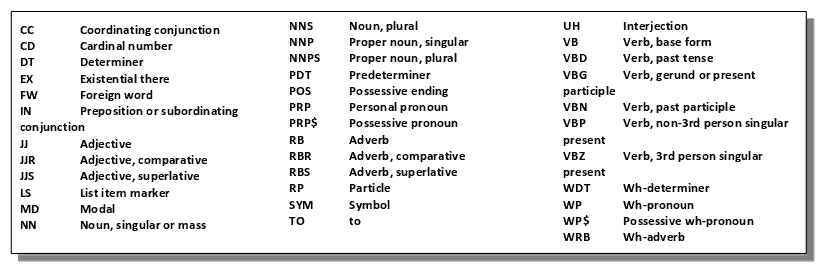

**Парсинг**

In [19]:
from nltk.corpus import treebank
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [20]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()
# Сейчас должна открыться картинка.

Строит дерево зависимостей. Возникают предложения , смысл которых можно понять по предудщим предложениям.

### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

**Рассмотрим несколько распространенных примеров использования регулярок.**

In [21]:
import re
# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров

In [22]:
word = 'supercalifragilisticexpialidocious'
re.findall('[aeiou]|super', word)

['super', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']

In [23]:
re.findall('\d+', 'There is some numbers: 49 and 432')

['49', '432']

In [24]:
re.sub('[,\.?!]',' ','How, to? split. text!').split()

['How', 'to', 'split', 'text']

In [25]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']

![Regexp](Regexp.png)

In [ ]:
!pip install spacy

### Spacy
#### Это еще одна быстрая библиотека с решениями для NLP.
#### В ней реализованы многие вещи, которые есть и в NLTK

**Например NER (Named entities recognition)**

In [ ]:
!python -m spacy download en 

In [26]:
import en_core_web_sm
import spacy
nlp = en_core_web_sm.load()

In [27]:
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


## 20 newsgroups это датасет с 18000 новостей, сгруппированных по 20 темам.

In [28]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [29]:
list(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
newsgroups_train.filenames.shape

(11314,)

In [31]:
newsgroups_train.target.shape

(11314,)

In [32]:
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

In [33]:
newsgroups_train.filenames.shape

(1073,)

In [34]:
newsgroups_train.data[0]

'From: bil@okcforum.osrhe.edu (Bill Conner)\nSubject: Re: Not the Omni!\nNntp-Posting-Host: okcforum.osrhe.edu\nOrganization: Okcforum Unix Users Group\nX-Newsreader: TIN [version 1.1 PL6]\nLines: 18\n\nCharley Wingate (mangoe@cs.umd.edu) wrote:\n: \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.\n\nBill\n'

In [35]:
newsgroups_train.target[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

### Давайте векторизуем эти тексты с помощью TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

#### Некоторые параметры TfidfVectorizer: 
#### input : string {‘filename’, ‘file’, ‘content’}
#### lowercase : boolean, default True
#### preprocessor : callable or None (default)
#### tokenizer : callable or None (default)
#### stop_words : string {‘english’}, list, or None (default)'
#### ngram_range : tuple (min_n, max_n)
#### max_df : float in range [0.0, 1.0] or int, default=1.0
#### min_df : float in range [0.0, 1.0] or int, default=1
#### max_features : int or None, default=None

In [37]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34118)

In [38]:
vectorizer = TfidfVectorizer(lowercase=False)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 42307)

In [39]:
vectorizer = TfidfVectorizer(min_df=0.2)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 90)

In [40]:
vectorizer = TfidfVectorizer(max_df=0.9)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34111)

In [41]:
# Эта штука работает дольше
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 40925)

In [42]:
vector = vectors.todense()[1]

In [43]:
vector

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [44]:
vector[vector != 0].shape

(1, 141)

In [45]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
wnl = nltk.WordNetLemmatizer()

In [46]:
def preproc1(text):
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

In [47]:
# Протестируем
st = "Oh, I think I ve landed Where there are miracles at work,  For the thirst and for the hunger Come the conference of birds"

In [48]:
preproc1(st)

'oh , think landed miracle work , thirst hunger come conference bird'

In [49]:
%%time
vectorizer = TfidfVectorizer(preprocessor=preproc1)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

Wall time: 1min 34s


In [50]:
vectors.shape

(2034, 31717)

**Давайте сравним скорость с лемматайзером spacy**

In [51]:
import spacy
nlp = spacy.load('en')

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [52]:
def preproc2(text):
    return ' '.join([token.lemma_ for token in nlp(text.lower()) if token not in stopWords])

In [53]:
preproc2(st)

'oh , i think i ve land where there be miracle at work ,   for the thirst and for the hunger come the conference of bird'

In [54]:
%%time
vectorizer = TfidfVectorizer(preprocessor=preproc2)
vectors = vectorizer.fit_transform(newsgroups_train.data)

Wall time: 9min 55s


In [55]:
vectors.shape

(2034, 29223)

**Как видим spacy делает кучу всего сразу, хотя мы хотим только лемму. Поэтому работает дольше (сильно).**

In [56]:
vectorizer = TfidfVectorizer(max_features=1500, preprocessor=preproc1)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 1500)

### Можем посмотреть на косинусную меру между векторами

#### В этих векторах очень много нулей, поэтому по умолчанию они записываются как sparce matrix для экономии памяти

In [57]:
import numpy as np
from numpy.linalg import norm

In [58]:
type(vectors)

scipy.sparse.csr.csr_matrix

In [59]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [60]:
np.unique(newsgroups_train.target)

array([0, 1, 2, 3], dtype=int64)

In [61]:
dense_vectors = vectors.todense()

In [62]:
dense_vectors.shape

(2034, 1500)

In [63]:
def cosine_sim(v1, v2):
    # v1, v2 (1 x dim)
    return np.array(v1 @ v2.T / norm(v1) / norm(v2))[0][0]

In [64]:
cosine_sim(dense_vectors[1], dense_vectors[1])

1.0000000000000002

In [65]:
cosines = []
for i in range(10):
    cosines.append(cosine_sim(dense_vectors[0], dense_vectors[i]))

In [66]:
# [1, 3, 2, 0, 2, 0, 2, 1, 2, 1]
cosines

[1.0,
 0.013234402729127756,
 0.0023691156170334185,
 0.02235694113966816,
 0.03646854513673787,
 0.012104582157857174,
 0.0274475883361666,
 0.12025122915826814,
 0.016803067934527717,
 0.01918954831470175]

**Cамым близким оказался вектор из той же категории**

**Так же можно попробовать сделать классификацию на основе этих векторов**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import SGDClassifier

In [68]:
svc = svm.SVC()

In [69]:
X_train, X_test, y_train, y_test= train_test_split(dense_vectors, newsgroups_train.target, test_size=0.2)

In [70]:
y_train.shape, y_test.shape

((1627,), (407,))

In [71]:
%%time
svc.fit(X_train, y_train)

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 21.1 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
from sklearn.metrics.classification import accuracy_score

In [73]:
accuracy_score(y_test, svc.predict(X_test))

0.5601965601965602

In [74]:
sgd = SGDClassifier()

In [75]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
accuracy_score(y_test, sgd.predict(X_test))

0.9361179361179361

### Попробуем классифицировать на основе embeddings

In [77]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

In [78]:
import gensim.downloader as api
embeddings = api.load('glove-twitter-25')

In [81]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')
    
    # наш preproc1
    words = preproc1(comment).split()
    for word in words:
        if word in embeddings:
            features += embeddings[f'{word}']
    
    return features

In [82]:
vectorize_sum('I can swim')

array([-1.0690e+00,  1.4740e-01,  1.5582e-01, -4.5698e-01, -8.0204e-01,
        4.7470e-01,  1.2425e+00, -9.0298e-01,  7.0123e-01, -6.7615e-02,
       -1.8999e-01, -1.7142e-01, -3.1259e+00,  1.7241e-01, -3.3581e-03,
        1.1369e+00,  4.6636e-01, -1.0841e+00,  4.3825e-01,  2.0401e-03,
       -1.0665e+00,  7.0757e-01,  9.5706e-01, -3.5242e-01,  8.5145e-01],
      dtype=float32)

In [83]:
X_wv = np.stack([vectorize_sum(text) for text in newsgroups_train.data])
X_train_wv, X_test_wv, y_train, y_test = train_test_split(X_wv, newsgroups_train.target, test_size=0.2)

In [84]:
X_train_wv.shape, X_test_wv.shape

((1627, 25), (407, 25))

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

wv_model = LogisticRegression().fit(X_train_wv, y_train)

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
accuracy_score(y_test, wv_model.predict(X_test_wv))

0.7076167076167076